In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(8000, 17)

In [4]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'options', 'details', 'how_to_use', 'ingredients',
       'exclusive'],
      dtype='object')

In [5]:
df.tail

<bound method NDFrame.tail of            id                    brand     category  \
0          50       SEPHORA COLLECTION  no category   
1         304       SEPHORA COLLECTION  no category   
2         404       SEPHORA COLLECTION  no category   
3         443       SEPHORA COLLECTION  no category   
4         463       SEPHORA COLLECTION  no category   
...       ...                      ...          ...   
7995  2293207                  VOLUSPA      Candles   
7996  2293439                 TOM FORD     Lipstick   
7997  2293488  FENTY BEAUTY by Rihanna     Lip Sets   
7998  2293793                    tarte      Mascara   
7999  2293801            John Varvatos      Perfume   

                                                   name            size  \
0                                             Gift Card         no size   
1                              Happy Birthday Gift Card         no size   
2                                        Lips Gift Card         no size   
3        

In [6]:
df.dtypes

id                     int64
brand                 object
category              object
name                  object
size                  object
rating               float64
number_of_reviews      int64
love                   int64
price                float64
value_price          float64
URL                   object
MarketingFlags          bool
options               object
details               object
how_to_use            object
ingredients           object
exclusive              int64
dtype: object

In [7]:
df.isnull().sum()

id                   0
brand                0
category             0
name                 0
size                 0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
URL                  0
MarketingFlags       0
options              0
details              0
how_to_use           0
ingredients          0
exclusive            0
dtype: int64

In [8]:
df.brand.value_counts(dropna=False)

SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Conture                 1
Cocofloss               1
Makeup Eraser           1
Flora + Bast            1
SHHHOWERCAP             1
Name: brand, Length: 310, dtype: int64

In [9]:
df.corr()

C:\Users\salma\AppData\Local\Temp\ipykernel_23808\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,exclusive
id,1.000000,-0.128524,-0.167505,-0.083636,-0.034433,-0.021393,0.272923,0.209206
rating,-0.128524,1.000000,0.065673,0.080780,0.052405,0.050259,-0.063950,-0.016711
number_of_reviews,-0.167505,0.065673,1.000000,0.744282,-0.087866,-0.090419,-0.091876,0.005239
love,-0.083636,0.080780,0.744282,1.000000,-0.092280,-0.092297,-0.049699,0.054858
price,-0.034433,0.052405,-0.087866,-0.092280,1.000000,0.987826,-0.073279,-0.185141
value_price,-0.021393,0.050259,-0.090419,-0.092297,0.987826,1.000000,-0.055461,-0.170379
MarketingFlags,0.272923,-0.063950,-0.091876,-0.049699,-0.073279,-0.055461,1.000000,0.644045
exclusive,0.209206,-0.016711,0.005239,0.054858,-0.185141,-0.170379,0.644045,1.000000


(7.5, -0.5)

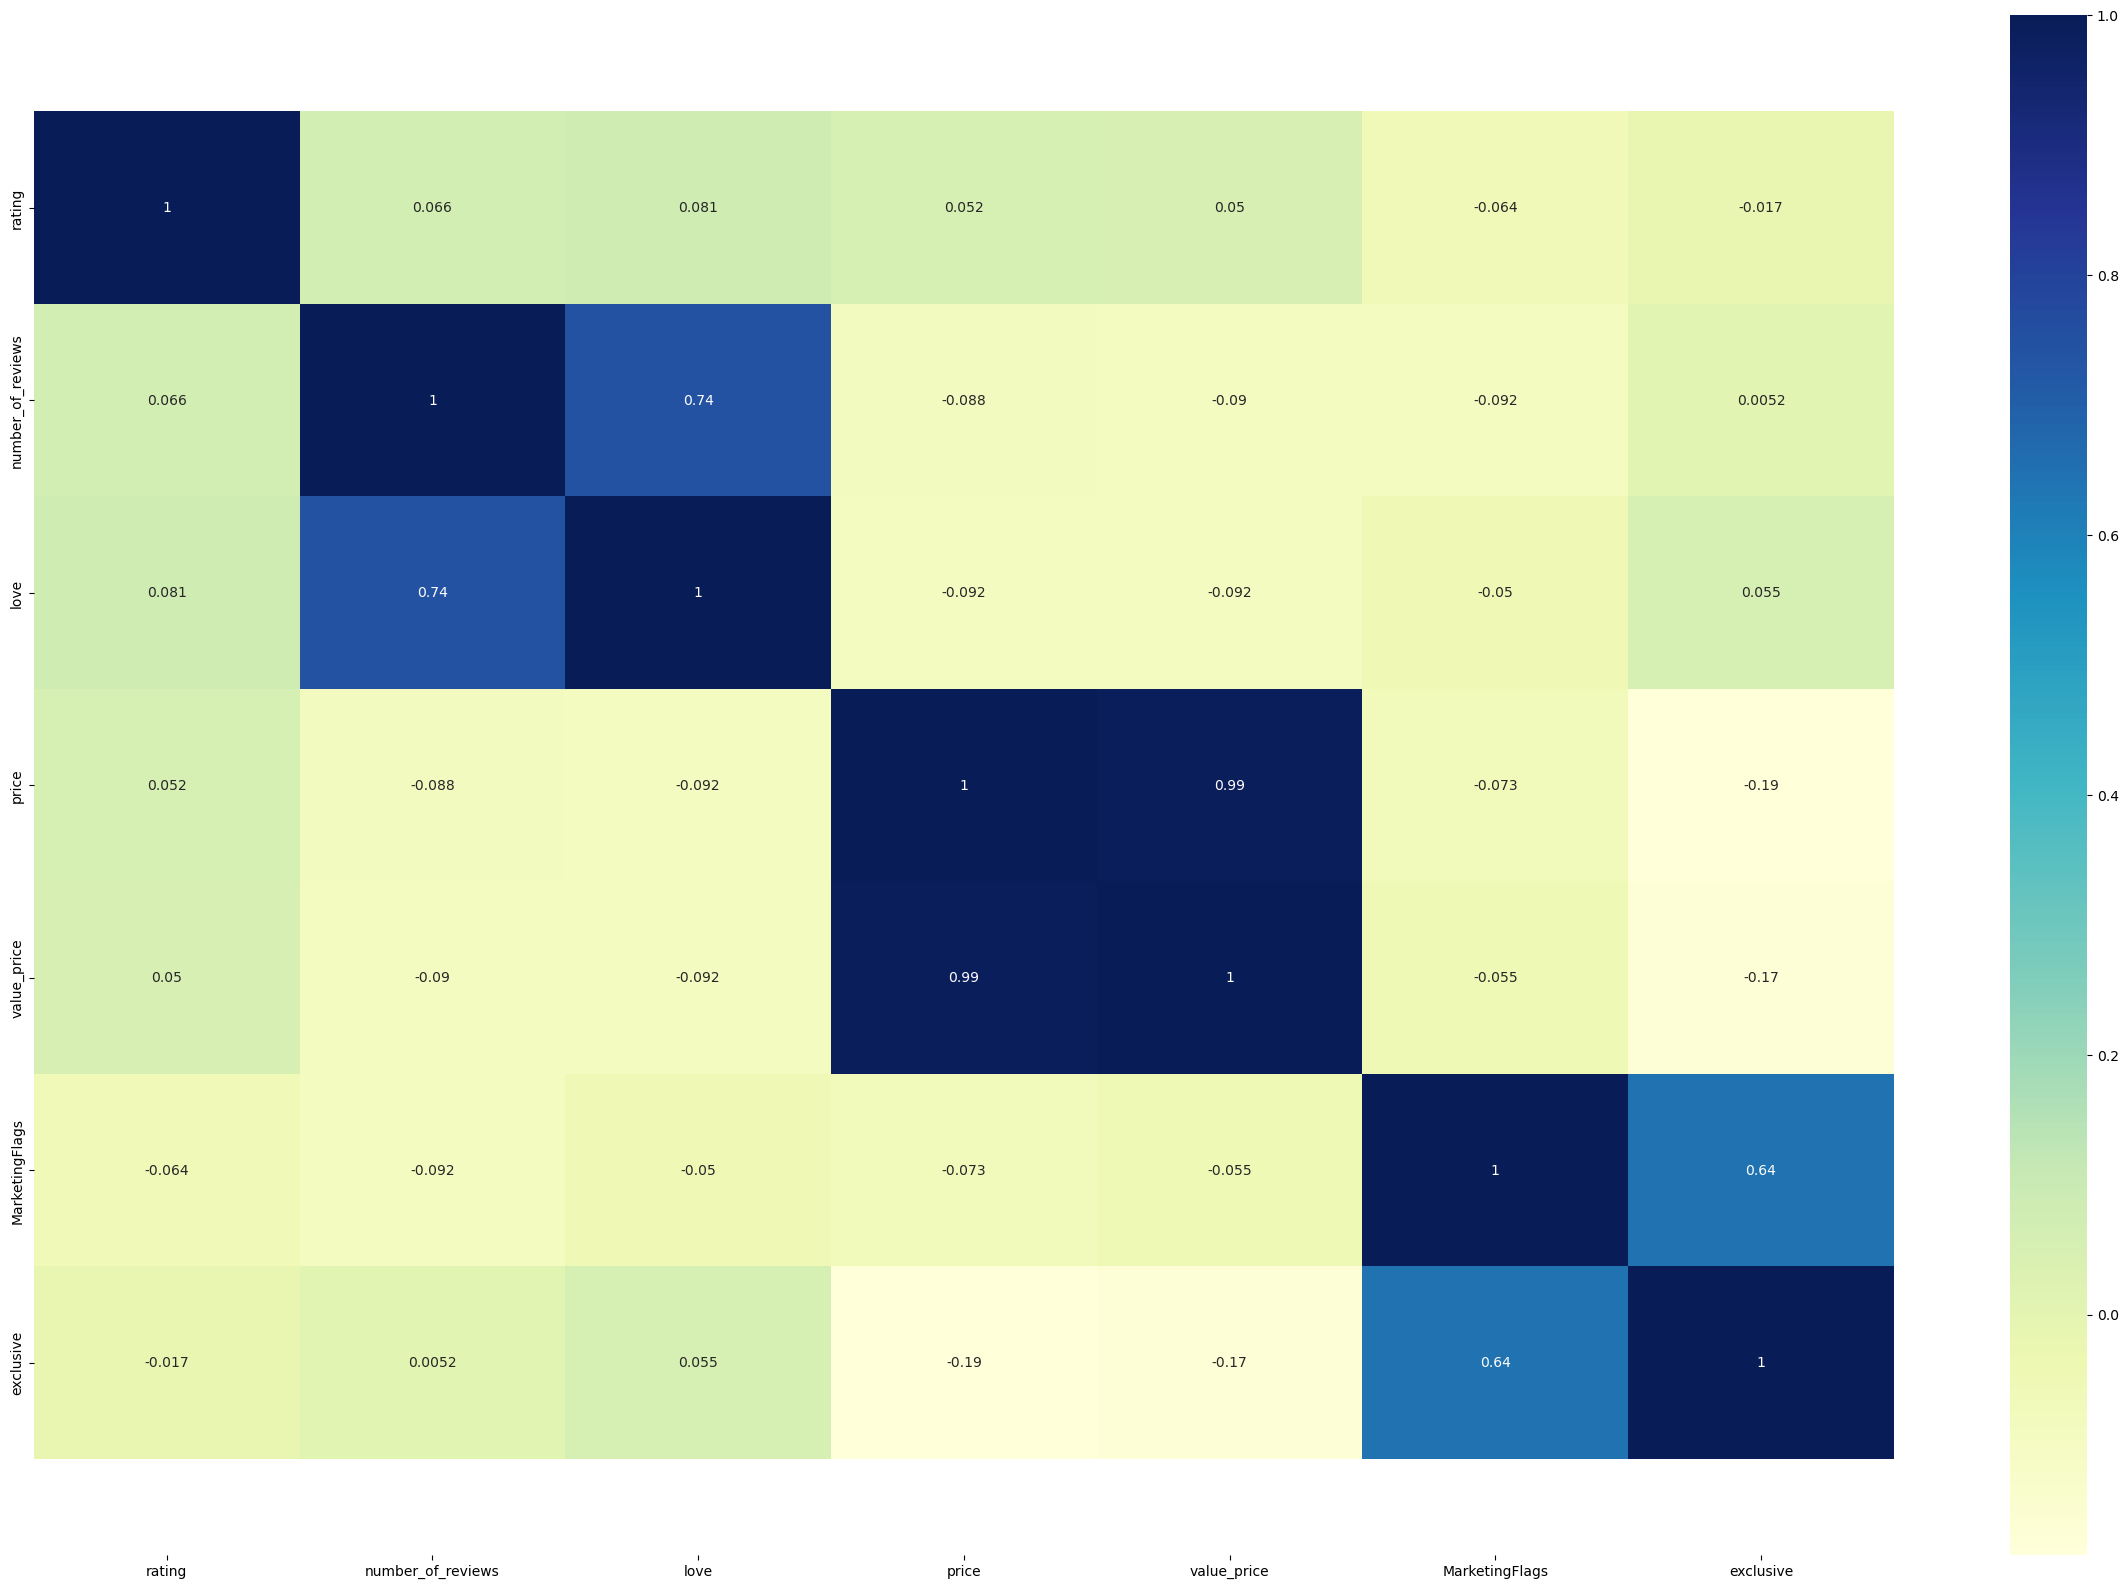

In [10]:
features = ['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'MarketingFlags', 'exclusive']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

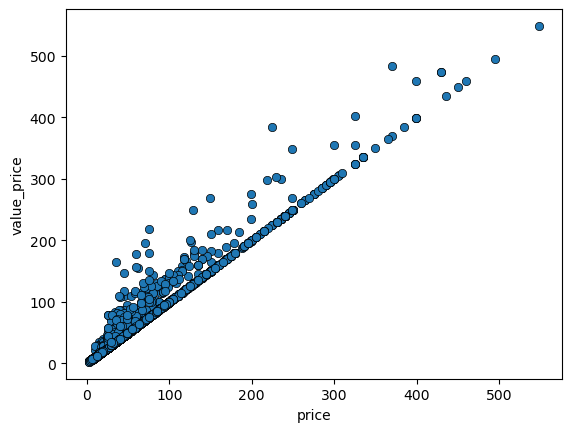

In [11]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['price'], y=df['value_price'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="price", ylabel="value_price")

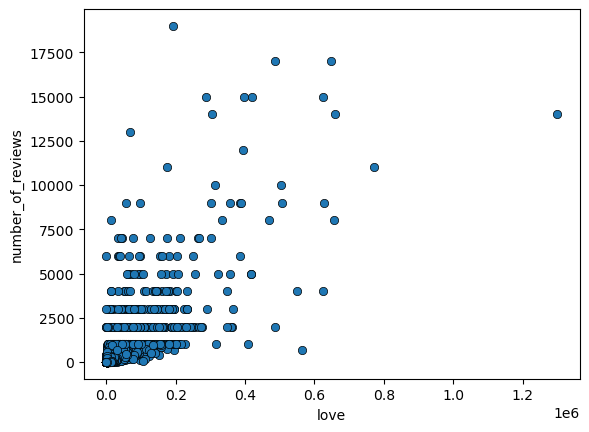

In [12]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['love'], y=df['number_of_reviews'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="love", ylabel="number_of_reviews")

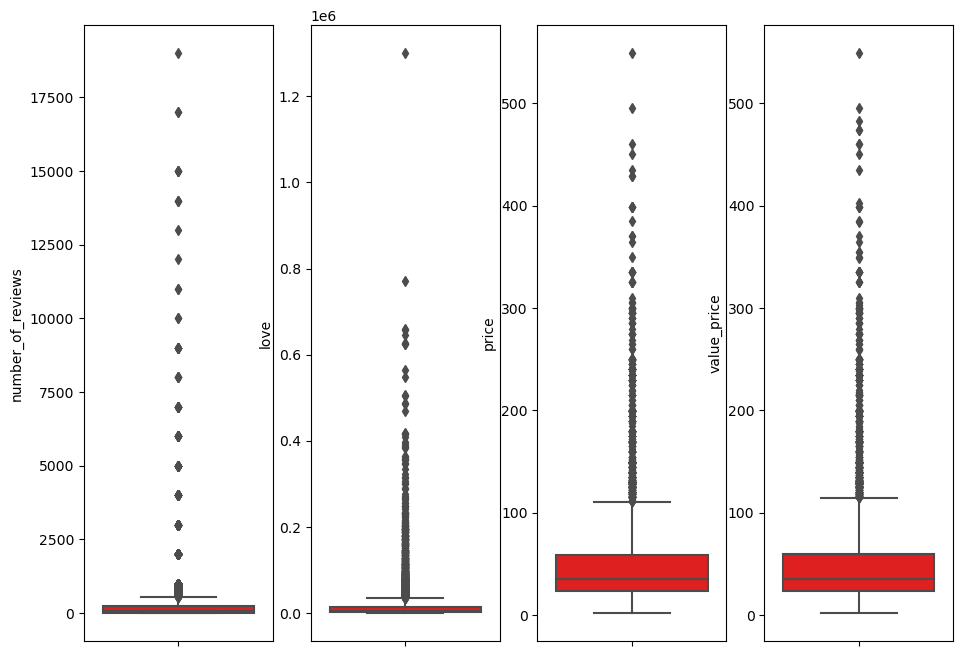

In [13]:


features = ['number_of_reviews', 'love', 'price', 'value_price']
plt.figure(figsize=(20, 8))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[features[i]],color='red',orient='v')



C:\Users\salma\AppData\Local\Temp\ipykernel_23808\943840278.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.value_price)


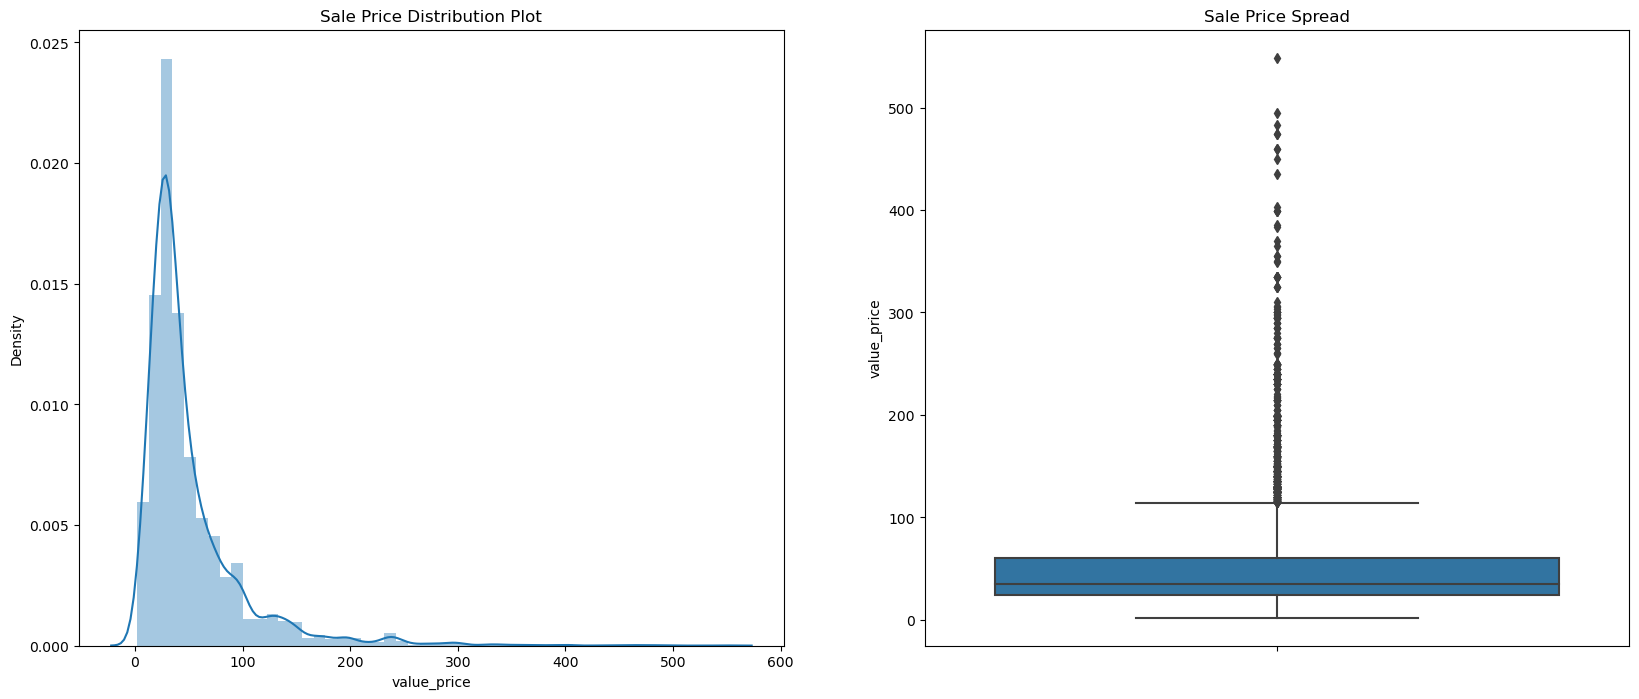

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(df.value_price)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df.value_price)

plt.show()

In [15]:
print(df.value_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    8000.000000
mean       51.082835
std        48.513402
min         2.000000
25%        24.000000
50%        35.000000
75%        60.000000
85%        85.000000
90%       100.000000
100%      549.000000
max       549.000000
Name: value_price, dtype: float64


In [16]:
df['number_of_reviews'] = np.log1p(df['number_of_reviews'])
df['love'] = np.log1p(df['love'])
df['price'] = np.log1p(df['price'])
df['value_price'] = np.log1p(df['value_price'])

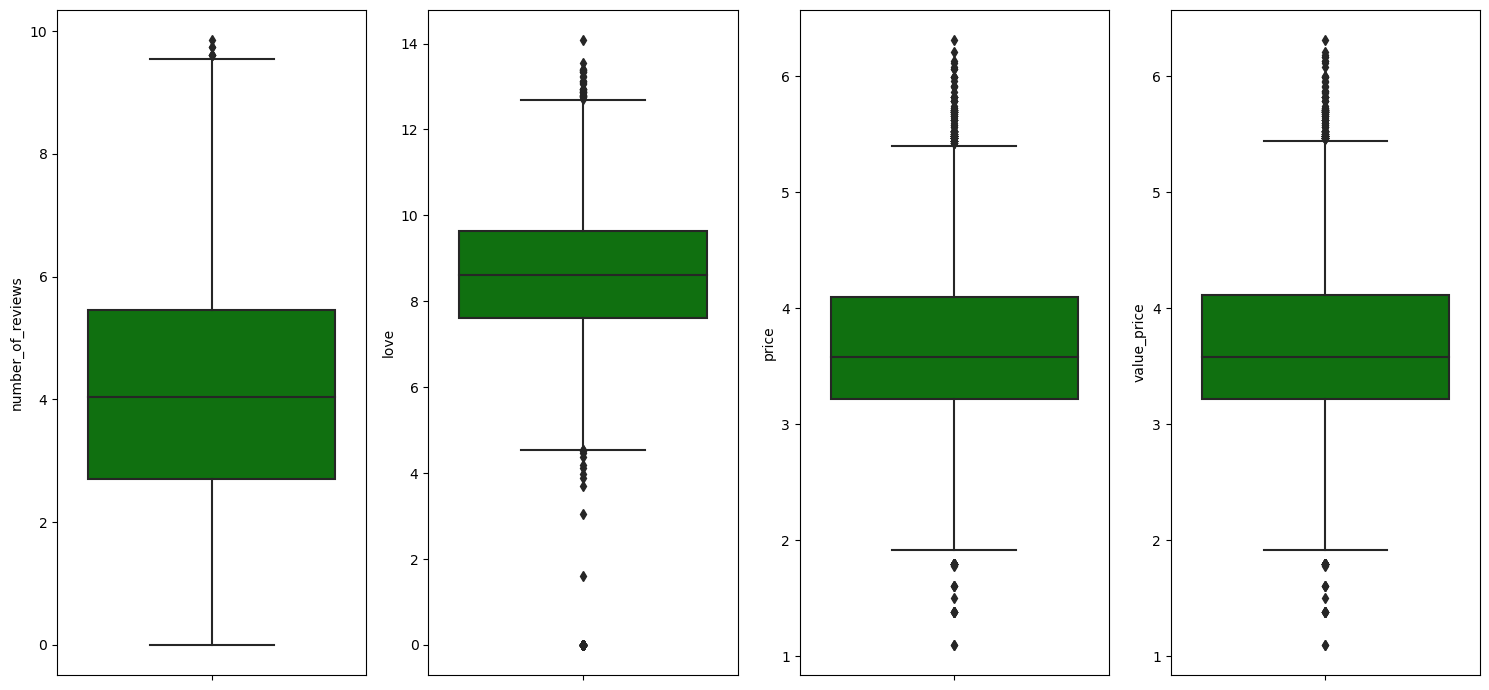

In [17]:


plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout()



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           8000 non-null   object 
 3   name               8000 non-null   object 
 4   size               8000 non-null   object 
 5   rating             8000 non-null   float64
 6   number_of_reviews  8000 non-null   float64
 7   love               8000 non-null   float64
 8   price              8000 non-null   float64
 9   value_price        8000 non-null   float64
 10  URL                8000 non-null   object 
 11  MarketingFlags     8000 non-null   bool   
 12  options            8000 non-null   object 
 13  details            8000 non-null   object 
 14  how_to_use         8000 non-null   object 
 15  ingredients        8000 non-null   object 
 16  exclusive          8000 

In [19]:
df['MarketingFlags'] = df.MarketingFlags.map({False:0, True:1})

In [20]:
df = df.drop(['id'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['URL'],axis=1)
df = df.drop(['options'],axis=1)
df = df.drop(['details'],axis=1)
df = df.drop(['how_to_use'],axis=1)
df = df.drop(['ingredients'],axis=1)
df = df.drop(['price'],axis=1)

In [21]:
df.tail()

,brand,category,size,rating,number_of_reviews,love,value_price,MarketingFlags,exclusive
7995,VOLUSPA,Candles,no size,0.0,0.000000,5.273000,4.454347,1,0
7996,TOM FORD,Lipstick,no size,4.0,3.433987,9.425532,4.025352,0,0
7997,FENTY BEAUTY by Rihanna,Lip Sets,no size,4.5,3.135494,9.465060,3.555348,1,1
7998,tarte,Mascara,no size,4.5,1.791759,7.783641,2.564949,1,0
7999,John Varvatos,Perfume,4.2 oz/ 125 mL,0.0,0.000000,4.110874,4.553877,1,0


In [22]:
df['rating']=df['rating'].astype(str)

In [23]:
# Get all the categorical columns
cat_cols = df.select_dtypes("object").columns

## One-Hot Encoding all the categorical variables but dropping one of the features among them.
drop_categ = []
for i in cat_cols:
    drop_categ += [ i+'_'+str(df[i].unique()[-1]) ]

## Create dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=cat_cols) 

## Drop the last column generated from each categorical feature
df.drop(drop_categ, axis=1, inplace=True)

In [24]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [25]:
X = df.drop('value_price', axis = 1) 
y = df['value_price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (6400, 1921)
Shape of the y Train : (6400,)
Shape of the X test : (1600, 1921)
Shape of the y test : (1600,)


In [28]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [40]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred= RandomForest.predict(X_test)

print("Accuracy on Traing set   : ",RandomForest.score(X_train,y_train))
print("Accuracy on Testing set  : ",RandomForest.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9595364001864723
Accuracy on Testing set  :  0.6876890202025522
__________________________________________
		Error Table
Mean Absolute Error      :  0.2642705028953719
Mean Squared Error       :  0.15957444502334947
Root Mean Squared Error  :  0.39946770210287275
R Squared Error          :  0.6876890202025522


Accuracy on Traing set   :  0.7717765812230727
Accuracy on Testing set  :  0.5281848458479335
__________________________________________
		Error Table
Mean Absolute Error      :  0.339320353933429
Mean Squared  Error      :  0.24107266874271246
Root Mean Squared Error  :  0.4909915159579771
R Squared Error          :  0.5281848458479335


Accuracy on Traing set   :  0.9008762951212178
Accuracy on Testing set  :  -1.8397239413986515e+20
__________________________________________
		Error Table
Mean Absolute Error      :  590687670.5412198
Mean Squared  Error      :  9.400019401663635e+19
Root Mean Squared Error  :  9695369720.471539
R Squared Error          :  -1.8397239413986515e+20
